In [4]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
SEED = 2022
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
data1 = pd.read_csv('./data/augmented_jellyfish.csv', encoding='utf-8-sig')
data2 = pd.read_csv('./data/jellyfish2.csv', encoding='utf-8-sig')
display(data1)
display(data2)

,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,부산 해운대,노무라입깃해파리_강독성,62.70,24.038810,31.600357,27.500714,1007.771786,7.089286,1.859643,3.050893,688.800000,1
1,부산 동백섬,보름달물해파리_약독성,20.31,22.330655,29.163095,24.781131,1006.784107,3.261905,3.759643,5.332381,60.700000,1
2,부산 청사포,보름달물해파리_약독성,29.63,26.590833,31.517381,25.794702,1007.467738,11.470238,2.240119,3.703452,406.892363,1
3,부산 해운대 청사포,야광원양해파리_강독성,0.52,19.592321,33.421369,21.206667,1008.481845,8.714286,2.472857,3.832440,36.252367,1
4,부산 오륙도,보름달물해파리_약독성,27.98,21.328452,31.956250,26.205595,1011.927738,5.380952,2.402440,3.221131,514.781985,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,부산 오륙도,노무라입깃해파리_강독성,18.54,26.265357,32.412811,29.344736,1005.157306,10.627070,2.512133,4.200308,514.781985,2
89996,부산 영도,노무라입깃해파리_강독성,38.60,25.000179,30.137500,24.265119,1012.116964,8.994048,1.740417,3.079405,1822.800000,2
89997,부산 해운대,유령해파리_강독성,3.24,18.592500,33.002917,23.662976,1007.936726,3.125000,3.264048,4.452679,231.510614,0
89998,부산 고리원자력 발전소,유령해파리_강독성,4.09,19.337381,33.001310,25.334821,1009.460060,3.708333,2.822381,3.871726,231.510614,2


,date,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,2017-06-08,부산 가덕도,노무라입깃해파리_강독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
1,2017-06-08,부산 가덕도,보름달물해파리_약독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
2,2017-06-08,부산 가덕도,살파류(척삭동물)_무해성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
3,2017-06-08,부산 가덕도,야광원양해파리_강독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
4,2017-06-08,부산 가덕도,오이빗해파리_약독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91843,2021-12-02,부산 해운대청사포 사이,야광원양해파리_강독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0
91844,2021-12-02,부산 해운대청사포 사이,오이빗해파리_약독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0
91845,2021-12-02,부산 해운대청사포 사이,유령해파리_강독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0
91846,2021-12-02,부산 해운대청사포 사이,작은상자해파리_맹독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0


In [7]:
labelencoder=LabelEncoder()
for col in data1.columns:
    data1[col] = labelencoder.fit_transform(data1[col])
for col in data2.columns:
    data2[col] = labelencoder.fit_transform(data2[col])
display(data1)
display(data2)

,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,75,0,253,104,45,117,34,47,24,28,6,1
1,34,1,171,86,7,97,20,8,128,128,1,1
2,70,1,216,123,43,104,29,119,59,75,4,1
3,79,3,7,50,104,56,42,70,81,82,0,1
4,59,1,212,75,57,109,75,16,71,40,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,59,0,163,117,74,128,9,105,86,100,5,2
89996,53,0,234,112,16,94,77,76,13,29,9,2
89997,75,5,58,36,90,88,35,7,122,111,2,0
89998,3,5,69,45,89,101,50,10,106,86,2,2


,date,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,0,0,0,0,25,125,34,51,63,83,85,2,0
1,0,0,1,0,25,125,34,51,63,83,85,2,0
2,0,0,2,0,25,125,34,51,63,83,85,2,0
3,0,0,3,0,25,125,34,51,63,83,85,2,0
4,0,0,4,0,25,125,34,51,63,83,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91843,128,88,3,0,0,92,1,127,81,49,46,9,0
91844,128,88,4,0,0,92,1,127,81,49,46,9,0
91845,128,88,5,0,0,92,1,127,81,49,46,9,0
91846,128,88,6,0,0,92,1,127,81,49,46,9,0


In [8]:
x1 = data1.iloc[:, :-1].values
y1 = data1.iloc[:, -1:].values
display(x1)
x1_train , x1_test , y1_train , y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
y1_train = tf.keras.utils.to_categorical(y1_train, num_classes=3)
y1_test = tf.keras.utils.to_categorical(y1_test, num_classes=3)

x2 = data2.iloc[:, 1:-1].values
y2 = data2.iloc[:, -1:].values
display(x2)

x2_train , x2_test , y2_train , y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
y2_train = tf.keras.utils.to_categorical(y2_train, num_classes=4)
y2_test = tf.keras.utils.to_categorical(y2_test, num_classes=4)

array([[ 75,   0, 253, ...,  24,  28,   6],
       [ 34,   1, 171, ..., 128, 128,   1],
       [ 70,   1, 216, ...,  59,  75,   4],
       ...,
       [ 75,   5,  58, ..., 122, 111,   2],
       [  3,   5,  69, ..., 106,  86,   2],
       [ 53,   5,  40, ...,  39,  69,   9]], dtype=int64)

array([[ 0,  0,  0, ..., 83, 85,  2],
       [ 0,  1,  0, ..., 83, 85,  2],
       [ 0,  2,  0, ..., 83, 85,  2],
       ...,
       [88,  5,  0, ..., 49, 46,  9],
       [88,  6,  0, ..., 49, 46,  9],
       [88,  7,  0, ..., 49, 46,  9]], dtype=int64)

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape = x1_train[0].shape),    
    tf.keras.layers.Dense(units=24, activation='relu'),                                     
    tf.keras.layers.Dense(units=12, activation='relu'),                                     
    tf.keras.layers.Dense(units=3, activation='softmax')                                    
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape = x2_train[0].shape),     
    tf.keras.layers.Dense(units=32, activation='relu'),                                     
    tf.keras.layers.Dense(units=16, activation='relu'),                                     
    tf.keras.layers.Dense(units=4, activation='softmax')                                    
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model1.summary()
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 39        
Total params: 2,091
Trainable params: 2,091
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                768       
________________________________

In [27]:
history1 = model1.fit(x1_train, y1_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
1800/1800 [==============================] - 1s 720us/step - loss: 0.1611 - accuracy: 0.9247 - val_loss: 0.1556 - val_accuracy: 0.9283
Epoch 2/25
1800/1800 [==============================] - 1s 709us/step - loss: 0.1666 - accuracy: 0.9232 - val_loss: 0.1464 - val_accuracy: 0.9294
Epoch 3/25
1800/1800 [==============================] - 1s 684us/step - loss: 0.1541 - accuracy: 0.9278 - val_loss: 0.1900 - val_accuracy: 0.9115
Epoch 4/25
1800/1800 [==============================] - 1s 690us/step - loss: 0.1654 - accuracy: 0.9243 - val_loss: 0.1712 - val_accuracy: 0.9265
Epoch 5/25
1800/1800 [==============================] - 1s 689us/step - loss: 0.1648 - accuracy: 0.9244 - val_loss: 0.1612 - val_accuracy: 0.9305


In [28]:
model1.evaluate(x1_test, y1_test)

563/563 [==============================] - 0s 715us/step - loss: 0.1628 - accuracy: 0.9287


[0.16283075511455536, 0.9287222027778625]

In [12]:
history2 = model2.fit(x2_train, y2_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/10
1837/1837 [==============================] - 2s 824us/step - loss: 0.1348 - accuracy: 0.9903 - val_loss: 0.0184 - val_accuracy: 0.9952
Epoch 2/10
1837/1837 [==============================] - 1s 744us/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0112 - val_accuracy: 0.9963
Epoch 3/10
1837/1837 [==============================] - 1s 748us/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0072 - val_accuracy: 0.9964
Epoch 4/10
1837/1837 [==============================] - 1s 746us/step - loss: 0.0088 - accuracy: 0.9965 - val_loss: 0.0087 - val_accuracy: 0.9963
Epoch 5/10
1837/1837 [==============================] - 1s 755us/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 0.0113 - val_accuracy: 0.9956
Epoch 6/10
1837/1837 [==============================] - 1s 751us/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0079 - val_accuracy: 0.9965


In [13]:
model2.evaluate(x2_test, y2_test)

575/575 [==============================] - 0s 500us/step - loss: 0.0091 - accuracy: 0.9966


[0.009098748676478863, 0.9965704679489136]

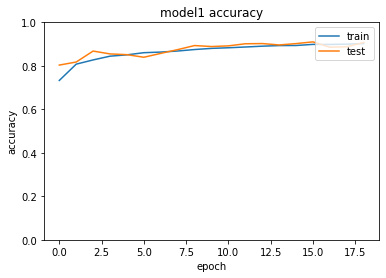

In [14]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./image/model1_accuracy.png')
plt.show()

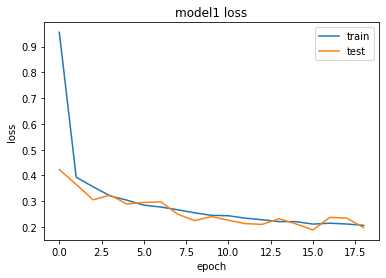

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./image/model1_loss.png')
plt.show()

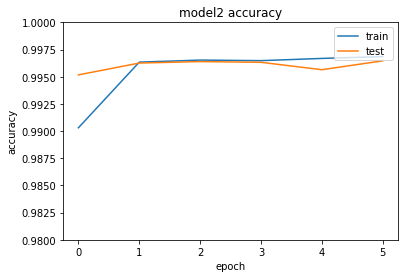

In [16]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.98,1])
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./image/model2_accuracy.png')
plt.show()

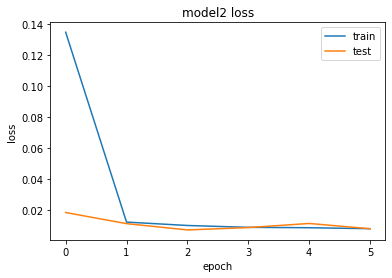

In [17]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./model2_loss.png')
plt.show()